# Introduction to Pandas and Numpy

**Nick Radcliffe.** Europython 2018. Monday 23rd July.

## Background

  * **Numpy and SciPy**
      * Numpy & Scipy are fast, powerful, stable libraries for numerical and scientific computing in Python, providing excellent C-like performance
      * They are probably the biggest reason Python has gained the success it has in Data Science
      * The are incredibly widely used, including by SciKit Learn
      * Initially created by Travis Oliphant (thanks, Travis!)
      * Excellent documentation
  * **Pronunciation**
      * It's a free country: you can pronounce them however you like. That said:
          * Numpy: NUM-PIE, (not NUM-PEE!)
          * SciPy: SIGH-PIE, (definitely not SKIPPY!!)
          * SciKit Learn: SIGH-KIT-LURN, (definitely, definitely not PSYCHIC LEARN!!!)
  * **Pandas**
      * Provides (column) database-style access to Numpy and Numpy-like data structures and adds further data-science-friendly operations.
      * Very widely used in data science.
      * Under active development; not particularly stable
      * Famously terrible documentation (but there are ongoing efforts to improve, including at sprints)
      * Initially created by Wes McKinney
      

## Basics

Most people import pandas as pd.

In [2]:
import pandas as pd

Pandas includes numpy as `np`, and it's convenient to have this available directly:

In [3]:
np = pd.np

A pandas DataFrame is quite like a database table, with named columns, eavh having a type, and values in different rows. Or you can think of it as being like a spreadsheet with column names in the top row and data of the same type in each column. The columns are all the same length.

We can create a Pandas DataFrame from Python lists, so we'll create a few of those.

In [4]:
numbers = list(range(10))

In [5]:
numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
squares = [i * i for i in numbers]

In [7]:
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [8]:
cubes = [float(i * i * i) for i in numbers]

In [9]:
cubes

[0.0, 1.0, 8.0, 27.0, 64.0, 125.0, 216.0, 343.0, 512.0, 729.0]

In [10]:
strings = ['s%d' % n for n in numbers]

In [11]:
strings

['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']

We can create a DataFrame from a Python dictionary whose keys are the column names we want, and whose values are lists of Python values. We create such a dictionary below. We're choosing the singular form for the column names because, which is slightly more natural when we start using the DataFrame.

In [12]:
d = {'number': numbers, 'square': squares, 'cube': cubes, 'string': strings}

In [13]:
d

{'number': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'square': [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 'cube': [0.0, 1.0, 8.0, 27.0, 64.0, 125.0, 216.0, 343.0, 512.0, 729.0],
 'string': ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']}

## Creating a DataFrame from a Python Dictionary

We can create a DataFrame simply by passing in the Python dictionary:

In [14]:
df = pd.DataFrame(d)

## Basic DataFrame Access

In [15]:
df

,number,square,cube,string
0,0,0,0.0,s0
1,1,1,1.0,s1
2,2,4,8.0,s2
3,3,9,27.0,s3
4,4,16,64.0,s4
5,5,25,125.0,s5
6,6,36,216.0,s6
7,7,49,343.0,s7
8,8,64,512.0,s8
9,9,81,729.0,s9


The first thing to notice here is that in addition to the values we put in, now arranged in columns, we have (in bold) a kind of row number. This is the **index** for the DataFrame, which gives us a way of referring to particular rows.

In [16]:
df.index

RangeIndex(start=0, stop=10, step=1)

We can use the ``.loc`` property to index pull out on or more rows from a DataFrame.

In [17]:
df.loc[3]  # get the value from the row with index 3

number     3
square     9
cube      27
string    s3
Name: 3, dtype: object

In [18]:
df.loc[4:6]  # rows 4 to 6 INCLUSIVE

,number,square,cube,string
4,4,16,64.0,s4
5,5,25,125.0,s5
6,6,36,216.0,s6


**NB:** Unlike Python, the end value in a range specified by ``.loc`` **includes** the last index specified.

We can refer to columns in the DataFrame by name in two different ways. We can use dot notation:

In [19]:
df.square

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
Name: square, dtype: int64

Notice that column has a ``dtype`` of ``int64``, which is similar to Python's ``int``, but **all** value in the column must share this type (which isn't the case for a Python list).
We can also access the ``dtype`` as a property on the column:

In [20]:
df.square.dtype

dtype('int64')

Another way to refer to the column is with ``[]`` (dictionary lookup) syntax:

In [21]:
df['string']

0    s0
1    s1
2    s2
3    s3
4    s4
5    s5
6    s6
7    s7
8    s8
9    s9
Name: string, dtype: object

**NB:** Strings are stored as dtype ``object``, which is ``dtype('O')``

In [22]:
df.string.dtype

dtype('O')

A few other useful things to know about DataFrames:

In [23]:
list(df)   # gets a list of the column names

['number', 'square', 'cube', 'string']

In [24]:
len(df) # gets the number of rows

10

In [25]:
df.size  # gets the number of "cells" in the DataFrame

40

## Getting Summary Information about Numeric Columns

We can get basic information about the numeric columns in a DataFrame with the ``.describe()`` method:


In [26]:
df.describe()

,number,square,cube
count,10.00000,10.000000,10.000000
mean,4.50000,28.500000,202.500000
std,3.02765,28.304888,251.294979
min,0.00000,0.000000,0.000000
25%,2.25000,5.250000,12.750000
50%,4.50000,20.500000,94.500000
75%,6.75000,45.750000,311.250000
max,9.00000,81.000000,729.000000


We can get these values by **aggregating** individual columns too:

In [27]:
df.number.count()  # Note, this would not include any missing values, if there were any (see later)

10

In [28]:
df.square.mean()  # arithmetic mean ("average")

28.5

In [29]:
df.cube.min(), df.cube.max()

(0.0, 729.0)

In [30]:
df.number.quantile(.25)  # This gets the 25th percentile value

2.25

In [31]:
df.number.sum()

45

We can do some similar things with string columns:

In [32]:
df.string.min(), df.string.max()

('s0', 's9')

We'll be able to see a bit more if we add a couple of new columns

## Adding and Deriving New Columns:

We can insert another Python list as a new column:

In [33]:
df['s2'] = list('ABBCCCDDDD')

We can also treat columns as vectors and do many arithmetic operations directly on them.

In [34]:
df['rem'] = df.number % 3

In [35]:
df['diff'] = df.cube - df.square

In [36]:
df

,number,square,cube,string,s2,rem,diff
0,0,0,0.0,s0,A,0,0.0
1,1,1,1.0,s1,B,1,0.0
2,2,4,8.0,s2,B,2,4.0
3,3,9,27.0,s3,C,0,18.0
4,4,16,64.0,s4,C,1,48.0
5,5,25,125.0,s5,C,2,100.0
6,6,36,216.0,s6,D,0,180.0
7,7,49,343.0,s7,D,1,294.0
8,8,64,512.0,s8,D,2,448.0
9,9,81,729.0,s9,D,0,648.0


## Mode & Unique Values

In [37]:
df.s2.mode()

0    D
dtype: object

Because there can be multiple values, the result of ``mode()`` is a Pandas Series (like a column in a DataFrame).

In [38]:
type(df.s2.mode())

pandas.core.series.Series

In [39]:
df.rem.mode()

0    0
dtype: int64

We can also get all the different values in a column using the Numpy ``.unique()`` function.

In [40]:
df.rem.unique()

array([0, 1, 2])

## Grouping Values with groupby

We can count the number of occurrences of each value as follows:

In [41]:
grouped = df.groupby('s2').s2.count()

In [42]:
grouped

s2
A    1
B    2
C    3
D    4
Name: s2, dtype: int64

In [43]:
type(grouped)

pandas.core.series.Series

In [44]:
grouped['C']

3

In the above, the ``df.groupby('s2')`` groups rows by common values of ``s2``. The ``.s2`` then pulls out the values from the ``s2`` column and the ``.count()`` counts them (the non-null values).

We could just as easily count the values in another field and (since there are no missing values here) the result will be the same.

In [45]:
df.groupby('s2').number.count()

s2
A    1
B    2
C    3
D    4
Name: number, dtype: int64

The index for this group-by Series is a string; if we want to look up a row by row-number rather than by the string index value, we can use ``.iloc`` rather than ``.loc``:

In [46]:
grouped.iloc[2]  # indexing from zero, we expect the result to be 3

3

We can compute other aggregations too:

In [47]:
df.groupby('s2').number.sum()

s2
A     0
B     3
C    12
D    30
Name: number, dtype: int64

In [48]:
df.groupby('s2').number.mean()

s2
A    0.0
B    1.5
C    4.0
D    7.5
Name: number, dtype: float64

## NULLs (missing values)

Let's look at how Pandas works with missing values

In [49]:
d  # Remind ourselves what's in our Python dictionary d

{'number': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'square': [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 'cube': [0.0, 1.0, 8.0, 27.0, 64.0, 125.0, 216.0, 343.0, 512.0, 729.0],
 'string': ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']}

Let's replace a couple of values with None:

In [50]:
d['number'][2] = None

In [51]:
d['string'][7] = None

In [52]:
d

{'number': [0, 1, None, 3, 4, 5, 6, 7, 8, 9],
 'square': [0, 1, 4, 9, 16, 25, 36, 49, 64, 81],
 'cube': [0.0, 1.0, 8.0, 27.0, 64.0, 125.0, 216.0, 343.0, 512.0, 729.0],
 'string': ['s0', 's1', 's2', 's3', 's4', 's5', 's6', None, 's8', 's9']}

In [53]:
df1 = df  # Save the old version for later

In [54]:
df = pd.DataFrame(d)

In [55]:
df

,number,square,cube,string
0,0.0,0,0.0,s0
1,1.0,1,1.0,s1
2,NaN,4,8.0,s2
3,3.0,9,27.0,s3
4,4.0,16,64.0,s4
5,5.0,25,125.0,s5
6,6.0,36,216.0,s6
7,7.0,49,343.0,None
8,8.0,64,512.0,s8
9,9.0,81,729.0,s9


Notice a couple of key things here:

  * The column ``number`` has turned into a floating-point column, and the Python None has become a ``NaN`` (not a number). ``NaN`` is used for missing values by Pandas, and like most relational databases, Pandas regards ``NaN``s as not really "there", so that when you count them they don't get counted. You can refer to ``NaN`` directly as ``np.NaN`` (or ``pd.np.nan`` or ``np.nan``).
  * The ``None`` in our string column has **not** been converted. That's because ``object`` columns can contain almost anything, including Python ``None``s. It's probably safer to convert that to an ``np.NaN``. 

In [56]:
df.number.dtype

dtype('float64')

We can convert all missing values (inluding Python ``None`` values) to something with ``.fillna()``.

In [57]:
df.string.fillna(np.NaN, inplace=True)  # inplace means change the df, rather than creatig a new one

In [58]:
df

,number,square,cube,string
0,0.0,0,0.0,s0
1,1.0,1,1.0,s1
2,NaN,4,8.0,s2
3,3.0,9,27.0,s3
4,4.0,16,64.0,s4
5,5.0,25,125.0,s5
6,6.0,36,216.0,s6
7,7.0,49,343.0,NaN
8,8.0,64,512.0,s8
9,9.0,81,729.0,s9


In [59]:
df.string.count()  # note that the NaN is not counted.

9

In [60]:
s = df.string.dropna()  # Drop any rows with missing values:

In [61]:
s

0    s0
1    s1
2    s2
3    s3
4    s4
5    s5
6    s6
8    s8
9    s9
Name: string, dtype: object

In the above, note that there is now a "hole" in the index where 7 used to be.

In [62]:
s.loc[8]  # loc still looks up by the index value

's8'

In [63]:
s.iloc[8]  # but .iloc looks up by row number

's9'

We can **reset** the index to fill in the hole.

In [64]:
s = s.reset_index()

In [65]:
s

,index,string
0,0,s0
1,1,s1
2,2,s2
3,3,s3
4,4,s4
5,5,s5
6,6,s6
7,8,s8
8,9,s9


As you can see, doing this turns the old index into a regular column called index. We can delete that with ``del``.

In [66]:
del s['index']

In [67]:
s

,string
0,s0
1,s1
2,s2
3,s3
4,s4
5,s5
6,s6
7,s8
8,s9


## Nulls don't contribute to groupby operations

In [68]:
df['rem'] = df.number % 3      # as before, but now with a null

In [69]:
df['s2'] = list('AABBBBBEE') + [np.NaN]

In [70]:
df

,number,square,cube,string,rem,s2
0,0.0,0,0.0,s0,0.0,A
1,1.0,1,1.0,s1,1.0,A
2,NaN,4,8.0,s2,NaN,B
3,3.0,9,27.0,s3,0.0,B
4,4.0,16,64.0,s4,1.0,B
5,5.0,25,125.0,s5,2.0,B
6,6.0,36,216.0,s6,0.0,B
7,7.0,49,343.0,NaN,1.0,E
8,8.0,64,512.0,s8,2.0,E
9,9.0,81,729.0,s9,0.0,NaN


In [71]:
df.groupby('s2').square.count()

s2
A    2
B    5
E    2
Name: square, dtype: int64

**NB:** there is no group for the missing value (``NaN``)

In [72]:
df.groupby('s2').number.count()

s2
A    2
B    4
E    2
Name: number, dtype: int64

**NB:** if we count ``number``, the count for ``b`` drops because of the missing value for ``number`` in row 2

If we want to include a group for the missing values in ``s2``, we need to convert it to something else. One good option is to stringify it:

In [73]:
df.groupby(df.s2.astype(str)).number.count()

s2
A      2
B      4
E      2
nan    1
Name: number, dtype: int64

## Plotting

We can plot (using matplotlib) straight from the DataFrame:

In [74]:
df.groupby(df.s2.astype(str)).number.count().plot.bar()

But to see it in the notebook we need to use a directive:

In [75]:
%matplotlib inline

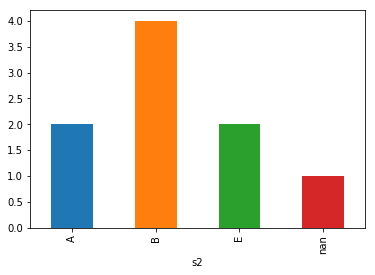

In [76]:
df.groupby(df.s2.astype(str)).number.count().plot.bar()

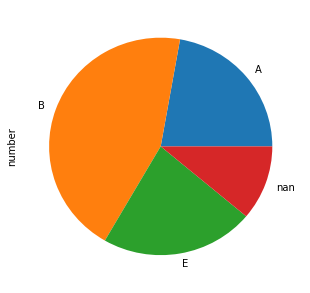

In [77]:
df.groupby(df.s2.astype(str)).number.count().plot.pie(figsize=(5,5))

## Appending DataFrames

We now have two DataFrames with similar columns:

In [78]:
df

,number,square,cube,string,rem,s2
0,0.0,0,0.0,s0,0.0,A
1,1.0,1,1.0,s1,1.0,A
2,NaN,4,8.0,s2,NaN,B
3,3.0,9,27.0,s3,0.0,B
4,4.0,16,64.0,s4,1.0,B
5,5.0,25,125.0,s5,2.0,B
6,6.0,36,216.0,s6,0.0,B
7,7.0,49,343.0,NaN,1.0,E
8,8.0,64,512.0,s8,2.0,E
9,9.0,81,729.0,s9,0.0,NaN


In [79]:
df1

,number,square,cube,string,s2,rem,diff
0,0,0,0.0,s0,A,0,0.0
1,1,1,1.0,s1,B,1,0.0
2,2,4,8.0,s2,B,2,4.0
3,3,9,27.0,s3,C,0,18.0
4,4,16,64.0,s4,C,1,48.0
5,5,25,125.0,s5,C,2,100.0
6,6,36,216.0,s6,D,0,180.0
7,7,49,343.0,s7,D,1,294.0
8,8,64,512.0,s8,D,2,448.0
9,9,81,729.0,s9,D,0,648.0


We can glue them together (creating one with all the rows from both) using the ``.append`` method.

Use ``sort=True`` to ensure that the right thing happens even if the columns are in different orders

In [80]:
df2 = df1.append(df, sort=True)

In [81]:
df2

,cube,diff,number,rem,s2,square,string
0,0.0,0.0,0.0,0.0,A,0,s0
1,1.0,0.0,1.0,1.0,B,1,s1
2,8.0,4.0,2.0,2.0,B,4,s2
3,27.0,18.0,3.0,0.0,C,9,s3
4,64.0,48.0,4.0,1.0,C,16,s4
5,125.0,100.0,5.0,2.0,C,25,s5
6,216.0,180.0,6.0,0.0,D,36,s6
7,343.0,294.0,7.0,1.0,D,49,s7
8,512.0,448.0,8.0,2.0,D,64,s8
9,729.0,648.0,9.0,0.0,D,81,s9


A few of things to note:

  * The index is a bit strange looking (and even stranger acting)
  * The ``dtype`` for a column will be adjusted to accommodate all the values, so that number, for example, ends up as as ``float`` column
  * The column that was not present in ``df`` is filled with null values there.
  
  

In [82]:
df2.loc[1]  # now selects BOTH rows with index 1

,cube,diff,number,rem,s2,square,string
1,1.0,0.0,1.0,1.0,B,1,s1
1,1.0,NaN,1.0,1.0,A,1,s1


In [83]:
df2.iloc[1]  # just the row at position 1

cube       1
diff       0
number     1
rem        1
s2         B
square     1
string    s1
Name: 1, dtype: object

In [84]:
[(k, df2[k].dtype) for k in df]  # get the names and types for each column

[('number', dtype('float64')),
 ('square', dtype('int64')),
 ('cube', dtype('float64')),
 ('string', dtype('O')),
 ('rem', dtype('float64')),
 ('s2', dtype('O'))]

In [85]:
df2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [86]:
df2.reset_index(inplace=True)  # restore sanity, in-place

In [87]:
df2

,index,cube,diff,number,rem,s2,square,string
0,0,0.0,0.0,0.0,0.0,A,0,s0
1,1,1.0,0.0,1.0,1.0,B,1,s1
2,2,8.0,4.0,2.0,2.0,B,4,s2
3,3,27.0,18.0,3.0,0.0,C,9,s3
4,4,64.0,48.0,4.0,1.0,C,16,s4
5,5,125.0,100.0,5.0,2.0,C,25,s5
6,6,216.0,180.0,6.0,0.0,D,36,s6
7,7,343.0,294.0,7.0,1.0,D,49,s7
8,8,512.0,448.0,8.0,2.0,D,64,s8
9,9,729.0,648.0,9.0,0.0,D,81,s9


## Database-style joins

We can also do database-style joins using the ``merge`` method.

<img src="https://farm2.staticflickr.com/1781/43564022191_aa03278c51_o.png" alt="Inner Database Join" width="400"/>
<img src="https://farm2.staticflickr.com/1824/43564022171_e1f9a35501_o.png" alt="Inner Database Join" width="400"/>

<img src="https://farm1.staticflickr.com/834/43564022291_2f3383a03f_o.png" alt="Inner Database Join" width="400"/>
<img src="https://farm1.staticflickr.com/840/42658576395_0f3020d289_o.png" alt="Inner Database Join" width="400"/>

The default kind of join is ``inner``, i.e. joining only values present in both DataFrames.

In [88]:
L = df1[['s2', 'number', 'cube']]

In [89]:
L

,s2,number,cube
0,A,0,0.0
1,B,1,1.0
2,B,2,8.0
3,C,3,27.0
4,C,4,64.0
5,C,5,125.0
6,D,6,216.0
7,D,7,343.0
8,D,8,512.0
9,D,9,729.0


In [90]:
R = df[['s2', 'number']]

In [91]:
R

,s2,number
0,A,0.0
1,A,1.0
2,B,NaN
3,B,3.0
4,B,4.0
5,B,5.0
6,B,6.0
7,E,7.0
8,E,8.0
9,NaN,9.0


In [92]:
LR = L.merge(R, on='number')

In [93]:
LR

,s2_x,number,cube,s2_y
0,A,0,0.0,A
1,B,1,1.0,A
2,C,3,27.0,B
3,C,4,64.0,B
4,C,5,125.0,B
5,D,6,216.0,B
6,D,7,343.0,E
7,D,8,512.0,E
8,D,9,729.0,NaN


Notes:

  * Row 9 didn't join because the keys didn't match.
  * The DataFrames didn't need to be in the same order.
  * Because there was a column ``s2`` in both DataFrames, ``_x`` was added to the fieldname from ``L``, and ``_y`` was added to field from ``R``. We can specify different suffixes, as below. 

Now let's look at a left join on ``s2``:

In [94]:
LR2 = L.merge(R, how='left', on='s2', suffixes=('L', 'R'))

In [95]:
LR2

,s2,numberL,cube,numberR
0,A,0,0.0,0.0
1,A,0,0.0,1.0
2,B,1,1.0,NaN
3,B,1,1.0,3.0
4,B,1,1.0,4.0
5,B,1,1.0,5.0
6,B,1,1.0,6.0
7,B,2,8.0,NaN
8,B,2,8.0,3.0
9,B,2,8.0,4.0


To understand what we got here, it helps to look at the three grouped counts:

In [96]:
L.groupby('s2').s2.count()

s2
A    1
B    2
C    3
D    4
Name: s2, dtype: int64

In [97]:
R.groupby('s2').s2.count()

s2
A    2
B    5
E    2
Name: s2, dtype: int64

In [98]:
LR2.groupby('s2').s2.count()

s2
A     2
B    10
C     3
D     4
Name: s2, dtype: int64

We got 10 = 2 * 5 values for ``B`` because there were two entries in L with B, and five in R. All combinations were produced.

## Sorting DataFrames

In [99]:
LR2.sort_values('s2')  # by column s2, ascending

,s2,numberL,cube,numberR
0,A,0,0.0,0.0
1,A,0,0.0,1.0
11,B,2,8.0,6.0
10,B,2,8.0,5.0
8,B,2,8.0,3.0
7,B,2,8.0,NaN
9,B,2,8.0,4.0
5,B,1,1.0,5.0
4,B,1,1.0,4.0
3,B,1,1.0,3.0


In [100]:
LR2.sort_values(['s2', 'cube'], ascending=[False, True], na_position='first')

,s2,numberL,cube,numberR
15,D,6,216.0,NaN
16,D,7,343.0,NaN
17,D,8,512.0,NaN
18,D,9,729.0,NaN
12,C,3,27.0,NaN
13,C,4,64.0,NaN
14,C,5,125.0,NaN
2,B,1,1.0,NaN
3,B,1,1.0,3.0
4,B,1,1.0,4.0


## More advanced column definitions

In [101]:
df

,number,square,cube,string,rem,s2
0,0.0,0,0.0,s0,0.0,A
1,1.0,1,1.0,s1,1.0,A
2,NaN,4,8.0,s2,NaN,B
3,3.0,9,27.0,s3,0.0,B
4,4.0,16,64.0,s4,1.0,B
5,5.0,25,125.0,s5,2.0,B
6,6.0,36,216.0,s6,0.0,B
7,7.0,49,343.0,NaN,1.0,E
8,8.0,64,512.0,s8,2.0,E
9,9.0,81,729.0,s9,0.0,NaN


### Replacing nulls with pandas fillna

In [102]:
df['s3'] = df['s2'].fillna('F')

In [103]:
df

,number,square,cube,string,rem,s2,s3
0,0.0,0,0.0,s0,0.0,A,A
1,1.0,1,1.0,s1,1.0,A,A
2,NaN,4,8.0,s2,NaN,B,B
3,3.0,9,27.0,s3,0.0,B,B
4,4.0,16,64.0,s4,1.0,B,B
5,5.0,25,125.0,s5,2.0,B,B
6,6.0,36,216.0,s6,0.0,B,B
7,7.0,49,343.0,NaN,1.0,E,E
8,8.0,64,512.0,s8,2.0,E,E
9,9.0,81,729.0,s9,0.0,NaN,F


### Conditionals with numpy.where

In [104]:
df['s4'] = np.where(df.square < 25, 'small', 'large')

In [105]:
df

,number,square,cube,string,rem,s2,s3,s4
0,0.0,0,0.0,s0,0.0,A,A,small
1,1.0,1,1.0,s1,1.0,A,A,small
2,NaN,4,8.0,s2,NaN,B,B,small
3,3.0,9,27.0,s3,0.0,B,B,small
4,4.0,16,64.0,s4,1.0,B,B,small
5,5.0,25,125.0,s5,2.0,B,B,large
6,6.0,36,216.0,s6,0.0,B,B,large
7,7.0,49,343.0,NaN,1.0,E,E,large
8,8.0,64,512.0,s8,2.0,E,E,large
9,9.0,81,729.0,s9,0.0,NaN,F,large


### Pandas String functions

In order to apply string functions to a Pandas column containing strings, we first need to use the ``.str`` property,
which effectively converts them Pandas strings to Python string objects, for which the string methods exist.

In [106]:
df['L'] = df.s2.str.lower()

In [107]:
df

,number,square,cube,string,rem,s2,s3,s4,L
0,0.0,0,0.0,s0,0.0,A,A,small,a
1,1.0,1,1.0,s1,1.0,A,A,small,a
2,NaN,4,8.0,s2,NaN,B,B,small,b
3,3.0,9,27.0,s3,0.0,B,B,small,b
4,4.0,16,64.0,s4,1.0,B,B,small,b
5,5.0,25,125.0,s5,2.0,B,B,large,b
6,6.0,36,216.0,s6,0.0,B,B,large,b
7,7.0,49,343.0,NaN,1.0,E,E,large,e
8,8.0,64,512.0,s8,2.0,E,E,large,e
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN


### Numpy Maths functions

In [108]:
df['sin'] = np.sin(df.number)

In [109]:
df['cos'] = np.cos(df.number)

In [110]:
df['one'] = (df.sin * df.sin + df.cos * df.cos).fillna(1)

In [111]:
df

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one
0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0
2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0
6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0


### Random Number Generation with numpy.random

In [112]:
df['r01'] = np.random.rand(10)   # random float between 0 and 1

In [113]:
df['ri'] = np.random.randint(70,100,10)  # random integers from range(70,100) (10 values)

In [114]:
df['normal'] = np.random.randn(10)   # random normal (10 values)

In [115]:
df

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal
0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0,0.309611,90,-0.696029
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327
2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0,0.297804,84,-0.999659
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247
6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0,0.201679,89,-0.364728
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750


### Binning into ranges with numpy.digitize

In [116]:
df['bin'] = np.where(pd.isnull(df.number),
                     3,                              # map nulls to 3
                     np.digitize(df.number, [3,6]))  # 3 bins: <3, 3<v<6, ≥6

In [117]:
df

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin
0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0,0.309611,90,-0.696029,0
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0
2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0,0.297804,84,-0.999659,3
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403,1
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1
6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0,0.201679,89,-0.364728,2
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054,2
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750,2


### Case statement using bins with numpy.choose

In [118]:
df['teeshirt'] = np.choose(df.bin, ['S', 'M', 'L', 'Unkown'])

In [119]:
df[['number', 'bin', 'teeshirt']]

,number,bin,teeshirt
0,0.0,0,S
1,1.0,0,S
2,NaN,3,Unkown
3,3.0,1,M
4,4.0,1,M
5,5.0,1,M
6,6.0,2,L
7,7.0,2,L
8,8.0,2,L
9,9.0,2,L


## Filtering DataFrames (cf. select ... where in SQL)

There are a couple of ways of selecting a subset of rows in a DataFrame. The "traditional" way is to use boolean masks like this:

In [120]:
df[df.sin > 0.5]

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0,S
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2,L
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054,2,L


What's actually happening here is that a boolean column is being created:

In [121]:
df.sin > 0.5

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9    False
Name: sin, dtype: bool

We can filter on such a boolean column directly:

In [122]:
c = pd.Series([False, True] * 5)

In [123]:
c

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

In [124]:
df[c]

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0,S
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1,M
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1,M
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2,L
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750,2,L


If we want to combine two conditions using this traditional approach, we use bit-wise boolean operators ``!`` (not), ``&``  (*and*) and ``|`` (*or*). Alternatively we use numpy's ``np.logical_not``, ``np.logical_and``, ``np.logical_or`` and even ``np.logical_xor``.

In [125]:
df[(df.sin > 0.5) & (df.cos < 0)]

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.1455,1.0,0.36877,91,1.006054,2,L


In [126]:
df[np.logical_and(df.sin > 0.5, df.cos < 0)]

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.1455,1.0,0.36877,91,1.006054,2,L


Recent versions of Pandas have introduced the ``.query`` method, which allows a more Pythonic specification (and is slightly more efficient):

In [127]:
df.query('number > 2 and number < 6')

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1,M
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403,1,M
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1,M


**NB:** query is powerful but a little fragile. For example, if we try to use the ``sin`` and ``cos`` columns, we get an error because those names conflict with function names.

## A little more on Pandas and Numpy Types

The values in a numpy array or a Pandas DataFrame are not Python norally types but, rather are underlying C types. We sometimes need to be slightly careful about this if we take values out of numpy/Pandas and use them in Python. We can use ``.item``, ``.items()`` and ``.values.tolist()`` to do this.

In [128]:
df.number[1]

1.0

In [129]:
type(df.number[1])

numpy.float64

In [130]:
type(df.number[1].item())

float

In [131]:
type(df.number)

pandas.core.series.Series

In [132]:
L = df.number.values.tolist()

In [133]:
L

[0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [134]:
[type(v) for v in L]

[float, float, float, float, float, float, float, float, float, float]

In [135]:
df.number.sum()

43.0

In [136]:
type(df.number.sum())

numpy.float64

In [137]:
type(df.number.sum().item())

float

Working with C values directly in Python is slow, and can give unxepected results, e.g.

In [138]:
df.bin[9]  # int64

2

In [139]:
df.bin[9] ** 64  # can overflow

0

In [140]:
2 ** 64  # cannot overflow

18446744073709551616

## Loading and Saving Data

There are a number of ways of loading data from and saving data to file. Probably the three most common are CSV, pickle and feather.

### CSV

In [141]:
df.to_csv('/tmp/df.csv')  # there are many options for specifying save format

In [142]:
df2 = pd.read_csv('/tmp/df.csv')  # there are many options for specifying load format

In [143]:
df2

,Unnamed: 0,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
0,0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0,0.309611,90,-0.696029,0,S
1,1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0,S
2,2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0,0.297804,84,-0.999659,3,Unkown
3,3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1,M
4,4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403,1,M
5,5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1,M
6,6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0,0.201679,89,-0.364728,2,L
7,7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2,L
8,8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054,2,L
9,9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750,2,L


Obviously, we've gained an extra column here. (You can suppress it with ``index=False`` when writing.)

In [144]:
del df2['Unnamed: 0']

In [145]:
df2

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0,0.309611,90,-0.696029,0,S
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0,S
2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0,0.297804,84,-0.999659,3,Unkown
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1,M
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403,1,M
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1,M
6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0,0.201679,89,-0.364728,2,L
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2,L
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054,2,L
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750,2,L


Worse, CSV is an inherently lossly format that cannot represent all possible values in a DataFrame.

In [146]:
df == df2

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True
6,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
7,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,False,True,True,False,True,False,False,True,True,False,True,True


Some of this is because ``np.NaN`` == ``np.NaN`` is ``False``:

In [147]:
np.NaN == np.NaN

False

If we fix these, if we're lucky it will work, but it may not because of numerical rounding.

In [148]:
all(df.fillna(0) == df2.fillna(0))

True

While it's almost impossible to avoid using CSVs quite a lot in much Data Science, they should be avoided where possible.

### Pickling a DataFrame

Pickling is a way to serialize almost any Python object to disk. Pickles are specific to Python, don't work across all platforms and Python versions and have security risks (loading a Pickle file can cause arbitrary code execution) but are a good option if you just want to save something to disk locally and read it back in the same version of Python in the not-too-distant future.

In [149]:
import pickle
with open('df.pk', 'wb') as f:
    pickle.dump(df, f)

In [150]:
with open('df.pk', 'rb') as f:
    df2 = pickle.load(f)
    

In [151]:
df2

,number,square,cube,string,rem,s2,s3,s4,L,sin,cos,one,r01,ri,normal,bin,teeshirt
0,0.0,0,0.0,s0,0.0,A,A,small,a,0.000000,1.000000,1.0,0.309611,90,-0.696029,0,S
1,1.0,1,1.0,s1,1.0,A,A,small,a,0.841471,0.540302,1.0,0.880563,82,-0.928327,0,S
2,NaN,4,8.0,s2,NaN,B,B,small,b,NaN,NaN,1.0,0.297804,84,-0.999659,3,Unkown
3,3.0,9,27.0,s3,0.0,B,B,small,b,0.141120,-0.989992,1.0,0.184967,83,-1.437021,1,M
4,4.0,16,64.0,s4,1.0,B,B,small,b,-0.756802,-0.653644,1.0,0.885765,82,1.117403,1,M
5,5.0,25,125.0,s5,2.0,B,B,large,b,-0.958924,0.283662,1.0,0.988277,92,-2.539247,1,M
6,6.0,36,216.0,s6,0.0,B,B,large,b,-0.279415,0.960170,1.0,0.201679,89,-0.364728,2,L
7,7.0,49,343.0,NaN,1.0,E,E,large,e,0.656987,0.753902,1.0,0.974027,90,1.656947,2,L
8,8.0,64,512.0,s8,2.0,E,E,large,e,0.989358,-0.145500,1.0,0.368770,91,1.006054,2,L
9,9.0,81,729.0,s9,0.0,NaN,F,large,NaN,0.412118,-0.911130,1.0,0.900475,91,-1.001750,2,L


In [152]:
all(df.fillna(0) == df2.fillna(0))

True

Saving with a pickle should work even if the DataFrame has a complex index, filters in place etc. (which isn't True of CSVs).

### Feather Format

Wes McKinney, the creator of Pandas, has teamed up with Hadley Wickham, a leading light in the R world, to create the ``feather`` file format, which provides a degree of interoperability between Pandas and R DataFrames. (Feather is built on top of the Apache Arrow project.)

There is a package called ``feather-format`` available, which allows loading and saving of simple DataFrames with a degree of cross-platform and cross-language independence. However, dates, string columns with nulls and empty DataFrames are all fragile with feather. We have an extended feather to write additional metadata by writing extra metadata in a `.pmm` file, which adds signficantly more robustness.

Install both with:
  * ``pip install feather-format``
  * ``pip install pmmif``
  
  

In [156]:
from pmmif.featherpmm import Dataset, read_dataframe, write_dataframe
write_dataframe(Dataset(df, name='df'), '/tmp/df.feather')


In [154]:
df2 = read_dataframe('/tmp/df.feather').df

In [155]:
all(df.fillna(0) == df2.fillna(0))

True